In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Set paths
dataset_path = '/content/drive/MyDrive/PlantDisease/banana'  # ✅ Change this path as per your folder
model_save_path = '/content/drive/MyDrive/savedModels/banana_disease_model.h5'

# STEP 3: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# STEP 4: Prepare data generators
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# STEP 5: Load MobileNetV2 base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze base model

# STEP 6: Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# STEP 7: Compile model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 8: Train model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

# STEP 9: Save trained model
model.save(model_save_path)
print("✅ Banana disease model saved at:", model_save_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2034 images belonging to 4 classes.
Found 506 images belonging to 4 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.11/dist-packages/PIL/JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 661s 10s/step - accuracy: 0.2895 - loss: 1.8432 - val_accuracy: 0.3893 - val_loss: 1.3762
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.3789 - loss: 1.4968 - val_accuracy: 0.5613 - val_loss: 1.0667
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.5238 - loss: 1.1876 - val_accuracy: 0.6719 - val_loss: 0.8450
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.5820 - loss: 1.0121 - val_accuracy: 0.7352 - val_loss: 0.7383
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6511 - loss: 0.8535 - val_accuracy: 0.7648 - val_loss: 0.6533
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7171 - loss: 0.7469 - val_accuracy: 0.8043 - val_loss: 0.5793
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7400 - loss: 0.6673 - val_accuracy: 0.8123 - val_loss: 0.5257
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7723 - loss: 0.6007 - val_accuracy: 0.8261 - val_los

✅ Banana disease model saved at: /content/drive/MyDrive/savedModels/banana_disease_model.h5


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving pestalotiopsis-leaf-blight-pestalotiopsis-flagisettula-attack-mangosteen-leaf-pestalotiopsis-fungus-causes-diseases-212252749.webp to pestalotiopsis-leaf-blight-pestalotiopsis-flagisettula-attack-mangosteen-leaf-pestalotiopsis-fungus-causes-diseases-212252749.webp


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🍌 Predicted Disease: cordana
✅ Confidence: 95.46%
💡 Fertilizer Suggestion: 🍂 Use fungicides such as Mancozeb or Copper oxychloride. Remove infected leaves and improve air flow.


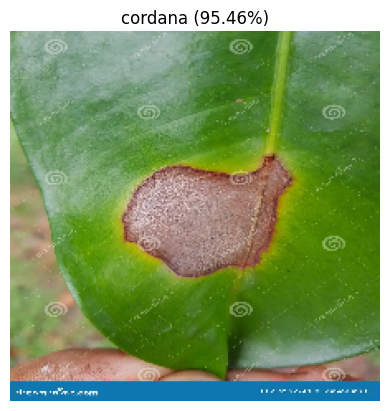

In [5]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Upload a banana leaf image
from google.colab import files
uploaded = files.upload()

import os
image_path = list(uploaded.keys())[0]

# STEP 3: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# STEP 4: Load your trained banana model
model = load_model('/content/drive/MyDrive/savedModels/banana_disease_model.h5')  # ✅ Update path if needed

# STEP 5: Preprocess the uploaded image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# STEP 6: Predict the disease
pred = model.predict(img_array)
class_index = np.argmax(pred[0])
confidence = np.max(pred[0]) * 100

# STEP 7: Class labels and updated fertilizer suggestions
class_labels = ['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']

fertilizer_suggestions = {
    'cordana': '🍂 Use fungicides such as Mancozeb or Copper oxychloride. Remove infected leaves and improve air flow.',
    'healthy': '✅ No disease detected. Maintain good nutrient balance with NPK and regular irrigation.',
    'pestalotiopsis': '🌿 Apply broad-spectrum fungicides like Carbendazim. Avoid overhead watering and prune infected parts.',
    'sigatoka': '🟡 Use systemic fungicides like Propiconazole. Ensure good drainage and air circulation in banana plantations.'
}

# STEP 8: Output prediction and suggestion
predicted_label = class_labels[class_index]
suggestion = fertilizer_suggestions[predicted_label]

print(f"🍌 Predicted Disease: {predicted_label}")
print(f"✅ Confidence: {confidence:.2f}%")
print(f"💡 Fertilizer Suggestion: {suggestion}")

# STEP 9: Display image
plt.imshow(img)
plt.axis('off')
plt.title(f"{predicted_label} ({confidence:.2f}%)")
plt.show()
